#### HR Analytics 

We explore an HR dataset for employees and try to examine relationships between attrition and user information. 

Question 1.) What is the age range and current attrition level of all records? 

In [29]:
# We import the file and prepare it for analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/Users/Kadibhai/Downloads/Thinkful Data Files/ibm-hr-analytics-employee-attrition-performance.zip')

# Convert Attrition and BusinessTravel variables from string to numeric

d={'No':0, 'Yes':1}
df['Attrition'] = df['Attrition'].map(d).fillna(df['Attrition'])
d={'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0}
df['BusinessTravel'] = df['BusinessTravel'].map(d).fillna(df['BusinessTravel'])
d={'No':0, 'Yes':1}
df['OverTime'] = df['OverTime'].map(d).fillna(df['OverTime'])
pd.set_option('display.max_columns', 200)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


The boxplot and summary stats below show how the range of values on Age varies between 18-60, with the middle quintile between 30-45 year olds. We can also see the mean age being 36.9 and std of 9. There are a few outliers that skew the mean towards a higher number. 

{'boxes': [<matplotlib.lines.Line2D at 0x113ccb518>],
 'caps': [<matplotlib.lines.Line2D at 0x114462400>,
 'fliers': [<matplotlib.lines.Line2D at 0x113726978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113ce2cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113ccbcc0>,
  <matplotlib.lines.Line2D at 0x113ccb160>]}

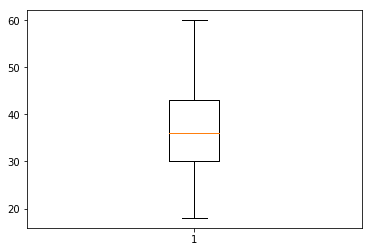

In [139]:
plt.boxplot(df['Age'])

Next, let's see how many records result in attrition. 

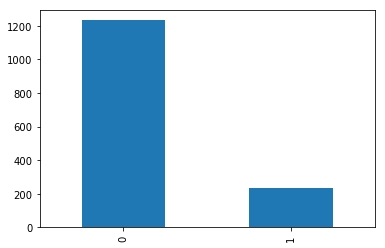

In [132]:
df.Attrition.value_counts().plot(kind='bar')

We can see that about 16% of instances show attrition which is over 200 records of the 1400. This would be the base rate of attrition for our population. 

2) Which factors are important to attrition? Does overtime affect attrition?

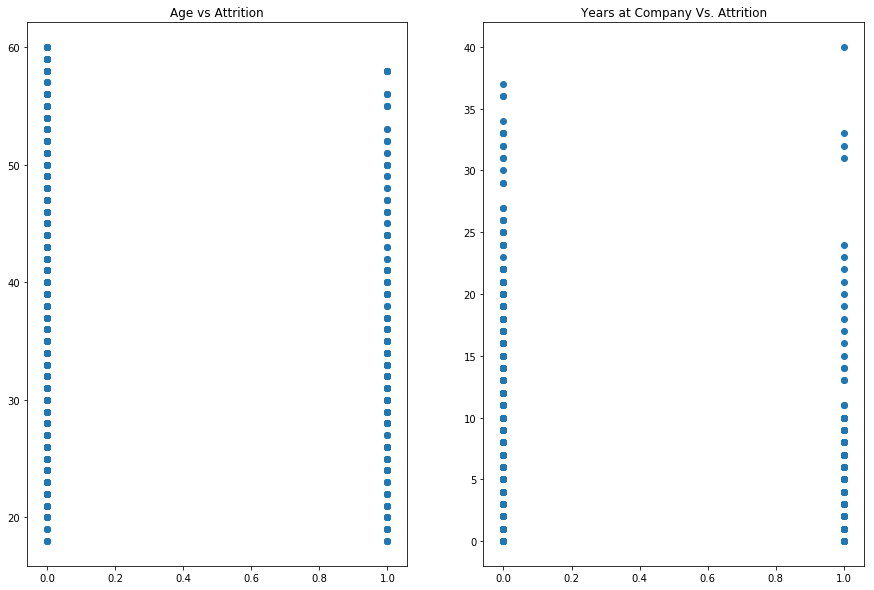

In [20]:
# lets first see if there is any correlation between age and attrition.

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.scatter(x=df['Attrition'],
            y=df['Age']
)
plt.title('Age vs Attrition')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Attrition'],
            y=df['YearsAtCompany']
)
plt.title('Years at Company Vs. Attrition')

We can see that there are a fewer instances of attrition when the age is above 55. 

Similarly, it shows gaps for attrition around years at company 12, 25-30, and 33-40 where attrition does not occur in population. This could have to do with customer loyalty which should increase after being with the company for many years and the probability of attrition should be lower. 

Total working years also displays a similar trend where there are fewers instances of attrition after about 30 years in the workforce. 

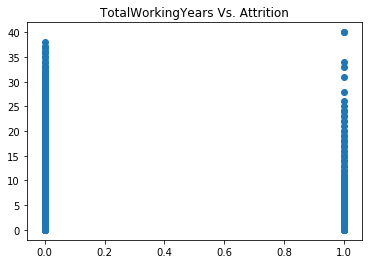

In [36]:
plt.scatter(
    x=df['Attrition'],
    y=df['TotalWorkingYears']
)
plt.title('TotalWorkingYears Vs. Attrition')

For the second part of the question we want to see what the overtime hour instances are and can see that about 400 records indicate overtime. This is double our attrition rate but it could still help us narrow the results and predict attrition. 

(array([ 1054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   416.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

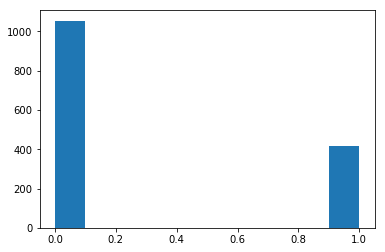

In [183]:
plt.hist(df['OverTime'])

This factor looks similar to the attrition rate so perhaps these two variables are related. The previous 3 variables Total Working Years, Age, and Years at Company also show some relationships to Attrition. 

The mean attrition rate when overtime is one is .3 which is 3 times higher than the .1 mean for when overtime is zero. This one variable provides us with a good differentiator for attrition. 

In [34]:
pd.set_option('display.max_columns', 300)
df.groupby(df['Attrition']).describe()

Age                                                    \
            count       mean      std   min   25%   50%   75%   max   
Attrition                                                             
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0   
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0   

          BusinessTravel                                               \
                   count      mean       std  min  25%  50%  75%  max   
Attrition                                                               
0                 1233.0  1.056772  0.526895  0.0  1.0  1.0  1.0  2.0   
1                  237.0  1.240506  0.533977  0.0  1.0  1.0  2.0  2.0   

          DailyRate                                                       \
              count        mean         std    min    25%    50%     75%   
Attrition                                                                  
0            1233.0  812.504461  403.208379  102.0  477.0  817.0  1176.0   
1             237.0  750.362869  401.899519  103.0  408.0  699.0  1092.0   

                  DistanceFromHome                                            \
              max            count       mean       std  min  25%  50%   75%   
Attrition                                                                      
0          1499.0           1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0   
1          1496.0            237.0  10.632911  8.452525  1.0  3.0  9.0  17.0   

                Education                                               \
            max     count      mean       std  min  25%  50%  75%  max   
Attrition                                                                
0          29.0    1233.0  2.927007  1.027002  1.0  2.0  3.0  4.0  5.0   
1          29.0     237.0  2.839662  1.008244  1.0  2.0  3.0  4.0  5.0   

          EmployeeCount                                    EmployeeNumber  \
                  count mean  std  min  25%  50%  75%  max          count   
Attrition                                                                   
0                1233.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         1233.0   
1                 237.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0          237.0   

                                                                        \
                  mean         std  min    25%     50%     75%     max   
Attrition                                                                
0          1027.656123  606.217074  2.0  483.0  1022.0  1574.0  2068.0   
1          1010.345992  580.750572  1.0  514.0  1017.0  1486.0  2055.0   

          EnvironmentSatisfaction                                          \
                            count      mean       std  min  25%  50%  75%   
Attrition                                                                   
0                          1233.0  2.771290  1.071132  1.0  2.0  3.0  4.0   
1                           237.0  2.464135  1.169791  1.0  1.0  3.0  4.0   

               HourlyRate                                                \
           max      count       mean        std   min   25%   50%   75%   
Attrition                                                                 
0          4.0     1233.0  65.952149  20.380754  30.0  48.0  66.0  83.0   
1          4.0      237.0  65.573840  20.099958  31.0  50.0  66.0  84.0   

                 JobInvolvement                                               \
             max          count      mean       std  min  25%  50%  75%  max   
Attrition                                                                      
0          100.0         1233.0  2.770479  0.692050  1.0  2.0  3.0  3.0  4.0   
1          100.0          237.0  2.518987  0.773405  1.0  2.0  3.0  3.0  4.0   

          JobLevel                                               \
             count      mean       std  min  25%  50%  75%  max   
Attrition                                                         
0           1233.0

The above figure is very helpful in showing for which factors there is a significant difference in means and we can see how there is low attrition for those with a longer history, with a higher salary, no overtime.

3) How is age and monthly income correlated?

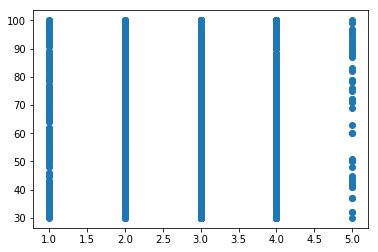

In [43]:
plt.scatter(x=df['Education'],y=df['HourlyRate'])

We can see that there are more instances where the education is a high level and the rate is high. Whereas, for education levels between 1-4 the hourly rate is spreadout across the range of hourly rate values. This seems inline with common beliefs that a higher education will result in higher wages. 

Conclusion

We were able to see the age range and analyzed various factors to demonstrate relationships that could help model target predictions for attrition. Grouping by attrition allowed us to view many of the relationships to the factors. The binary / categorical nature of many variables reduced visibility into patterns, but we were able to show how higher salary, less overtime, and more time with the company reduced probability for attrition. For further analysis, we could change the target prediction to that of salary. 